## 텍스트 생성

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

import urllib

import warnings
warnings.filterwarnings(action='ignore')

print(tf.__version__)

2.17.0


In [2]:
# irish-lyrics-eof.txt 데이터셋 파일 다운로드 , Windows용
# url = 'https://github.com/aaBadri/nlp-tf/blob/master/irish-lyrics-eof.txt'
# urllib.request.urlretrieve(url, 'irish-lyrics-eof.txt')

In [3]:
# 토큰화
tokenizer = Tokenizer()

data = open('irish-lyrics-eof.txt').read()

corpus = data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
# print(tokenizer.wor//d_index)
print(total_words)  # 2690

2690


In [4]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len,
                                         padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)  # 원핫 인코딩

In [5]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', 
              optimizer=adam,
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 학습
history = model.fit(xs, ys, epochs=100, verbose=1)
print(model)

Epoch 1/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.0592 - loss: 6.8723
Epoch 2/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1064 - loss: 5.7477
Epoch 3/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.1725 - loss: 4.7208
Epoch 4/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.2561 - loss: 3.7926
Epoch 5/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.2496 - loss: 4.2052
Epoch 6/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.3978 - loss: 2.7899
Epoch 7/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.4977 - loss: 2.1949
Epoch 8/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5811 - loss: 1.7847
Epoch 9/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.6517 - loss: 1.4791
Epoch 10/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6787 - loss: 1.3528
Epoch 11/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.6928 - loss: 1.2970
Epoch 12/100
377/377 ━━━━━━━━━

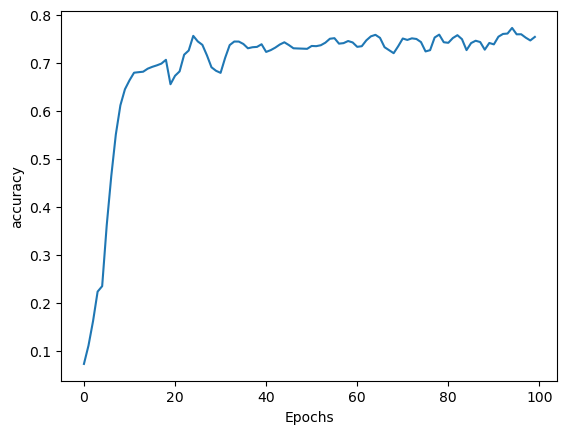

In [7]:
# 시각화
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()
    
plot_graphs(history, 'accuracy')

In [8]:
# 텍스트(문장) 생성
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = tf.argmax(model.predict(token_list, verbose=0),axis=1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this day and her before go bragh a ball or swim under too ra alone sinking them until you love cry my notes are no longer far away forbid i slower and morn in thc wheel barrow love victory beaming and sinking see in high he bore my rapier mauser music now tis trod love light crystal fountain water crying munroe and sinking them up in dublin until i sinking rode early says be gone and gone and gone lies waiting in the morning he treads the rat catchers daughter abusing lies waiting bay returning alone between love is love cry
